# 0 Setup

In [8]:
library(here)
setwd(here())
print(getwd())
source(file="misc_functions.R")
source("experiments/titanic_challenge/1_feature_engineering.R")

library(lattice)

[1] "/home/sapristi/Documents/ML"


In [21]:
train.raw <- read.csv("datasets/titanic_na/train.csv")
train.ff <- fe$forge_features(train.raw)

train.raw$Survived <- as.factor(train.raw$Survived)
cols.notna <-  (!is.na(train.raw$Age))
train.notna <- train.raw[cols.notna,]

train.notna$Pclass <- as.factor(train.raw$Pclass[cols.notna])
train.notna$Title <- train.ff$Title[cols.notna]
train.notna$Age <- train.ff$Age[cols.notna]
train.notna$Age.simple <- train.ff$Age.simple[cols.notna]
train.notna$Age.disc5 <- train.ff$Age.disc5[cols.notna]

train.notna$Fare.disc10 <- sapply(train.notna$Fare, function (f) {as.integer(f/10)})
train.notna$Fare.disc10 <- as.factor(train.notna$Fare.disc10)

train.notna$Fare.sqrtdisc <- sapply(train.notna$Fare, function(f) {as.integer(sqrt(f)/3)})
train.notna$Fare.sqrtdisc <- as.factor(train.notna$Fare.sqrtdisc)


# 1.1 Visualisation

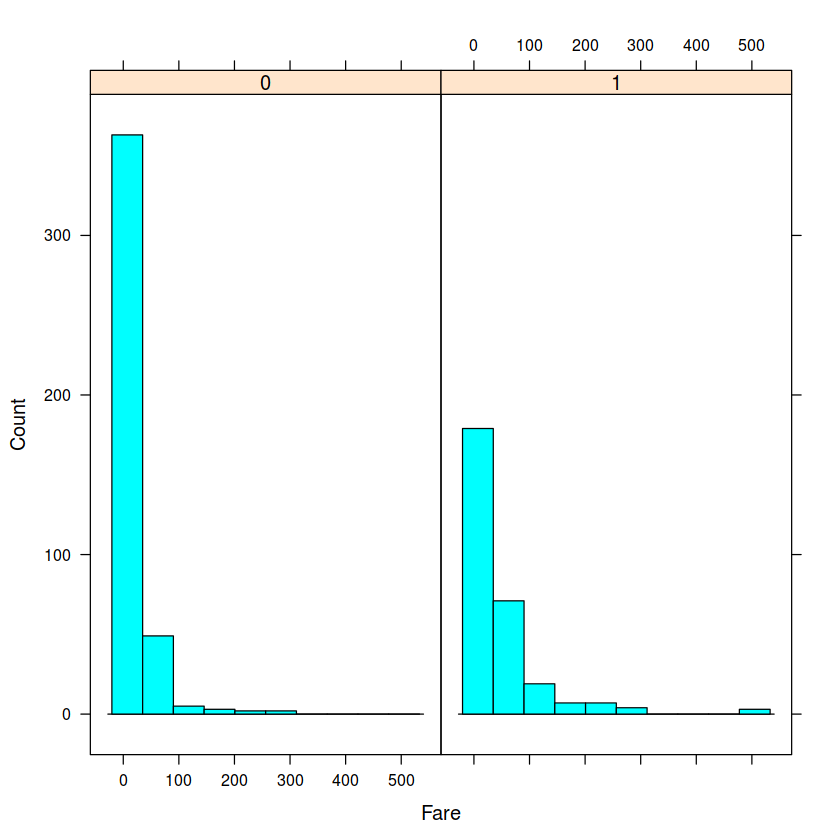

In [22]:
histogram(~Fare | Survived , data = train.notna, type="count")

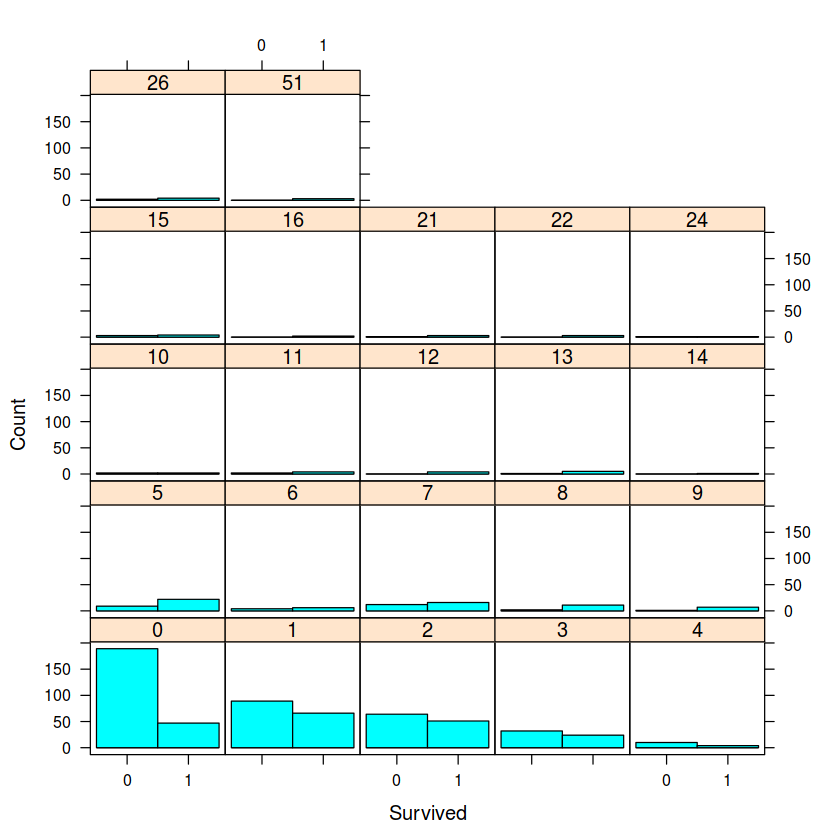

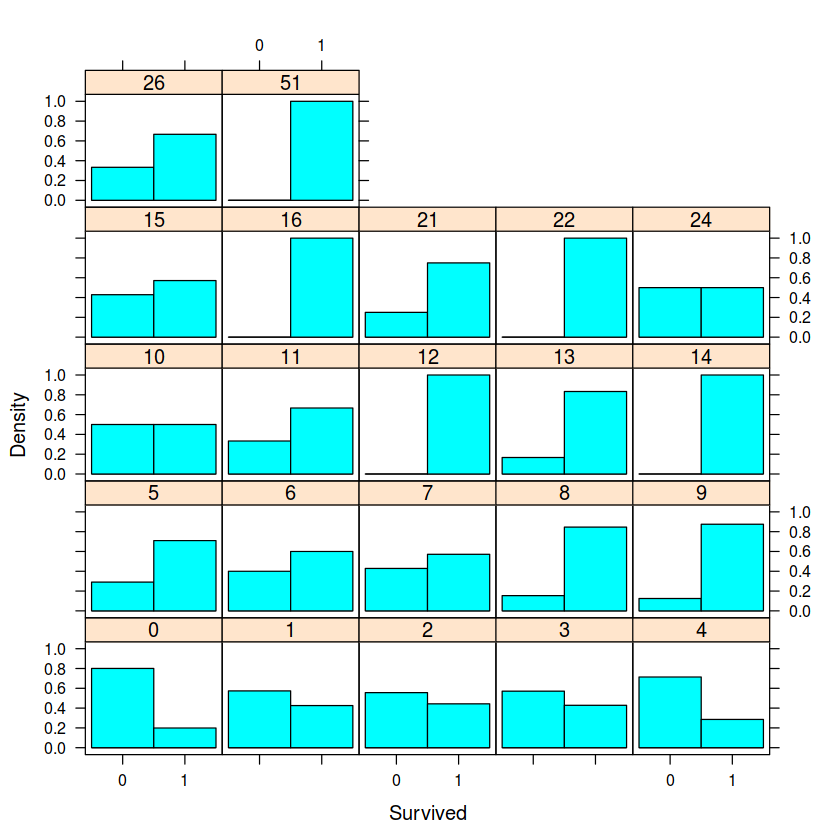

In [23]:
histogram( ~ Survived  | Fare.disc10, data = train.notna, type="count", 
          lattice.options = list(key = list(cex.title = 50)))
histogram( ~ Survived  | Fare.disc10, data = train.notna, type="density")


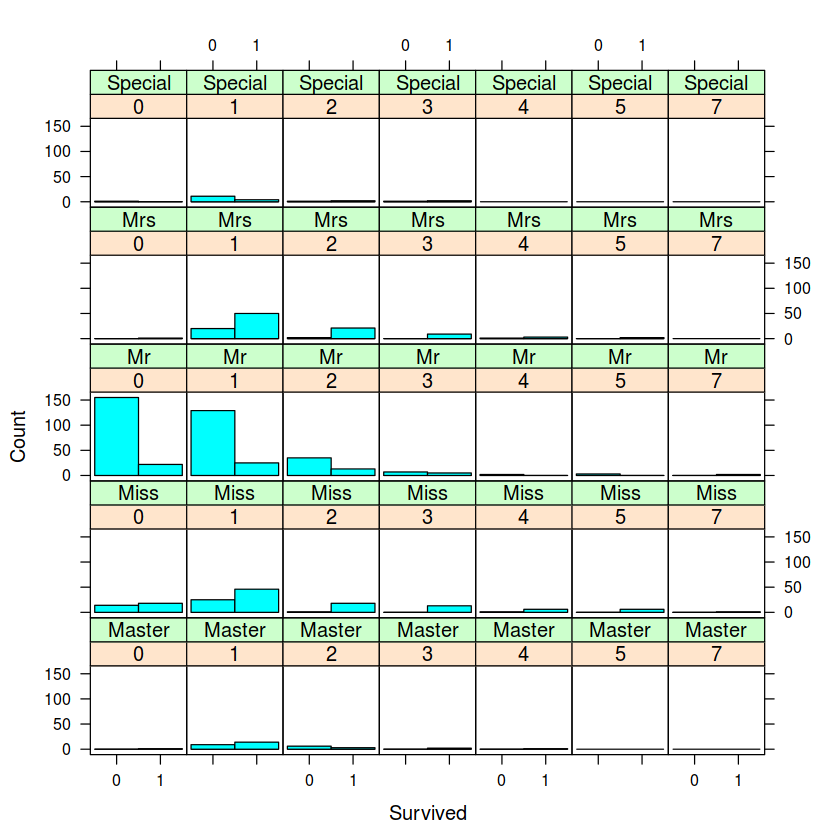

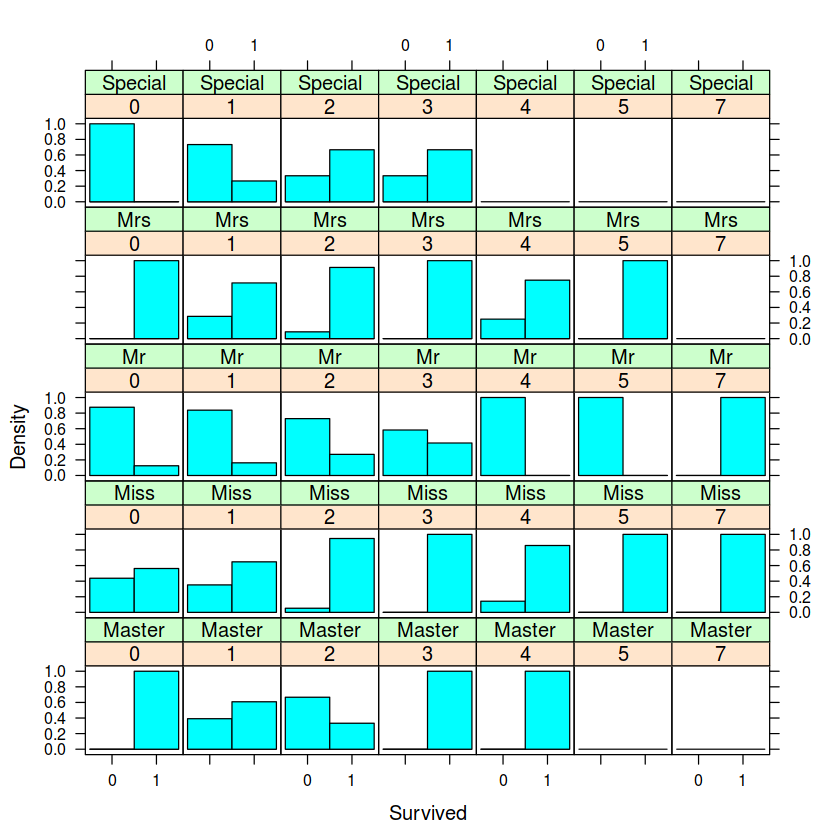

In [24]:
histogram( ~ Survived  | Fare.sqrtdisc + Title, data = train.notna, type="count", 
          lattice.options = list(key = list(cex.title = 50)))
histogram( ~ Survived  | Fare.sqrtdisc + Title, data = train.notna, type="density")


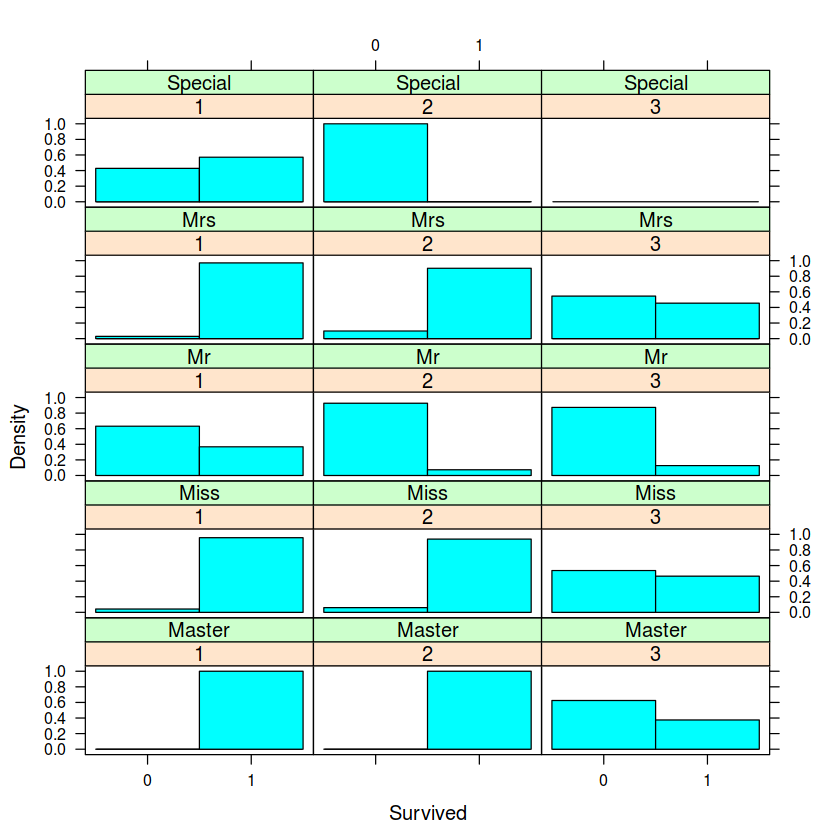

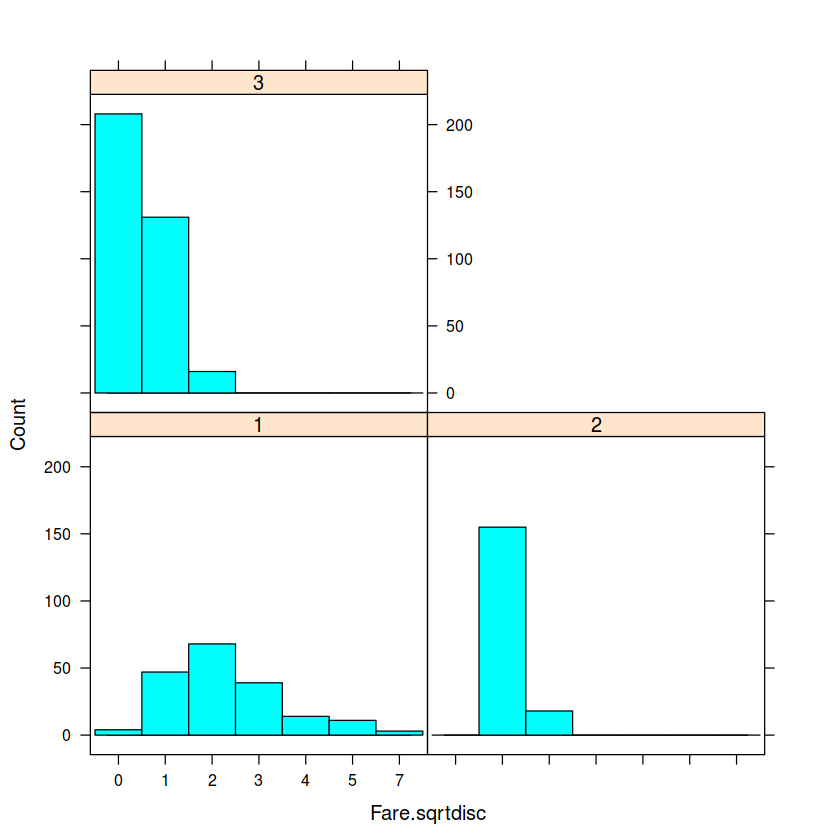

In [25]:
histogram( ~ Survived  | Pclass + Title, data = train.notna, type="density")
histogram(~ Fare.sqrtdisc | Pclass, data = train.notna, type="count")

# Conclusion

 + Putting Fare at a square root scale seems good enough, we could maybe improve the scale a bit (or go to a log scale) but the results will be approximately the same.
 + Fare seems a good indicator 
 + Some fare are equal to 0. It seems that these should actually be NA, so we will need to re